In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [4]:
X=df.drop(columns='Outcome',axis=1)
Y =df['Outcome']

In [5]:
models = [LogisticRegression(max_iter=2000),RandomForestClassifier(),KNeighborsClassifier(n_neighbors=5),SVC(kernel='rbf')]

In [6]:
def compare_models_cross_validation():

    for model in models:

        cv_score = cross_val_score(model, X,Y, cv=5)

        mean_accuracy = sum(cv_score)/len(cv_score)

        mean_accuracy = mean_accuracy*100

        mean_accuracy = round(mean_accuracy, 2)

        print('Cross Validation accuracies for ', model, '=  ', cv_score)
        print('Accuracy % of the ', model, mean_accuracy)
        print('----------------------------------------------')

In [7]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=2000) =   [0.7625 0.7875 0.7925 0.7525 0.8075]
Accuracy % of the  LogisticRegression(max_iter=2000) 78.05
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [1.    1.    1.    0.965 1.   ]
Accuracy % of the  RandomForestClassifier() 99.3
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =   [0.775  0.86   0.865  0.7875 0.8425]
Accuracy % of the  KNeighborsClassifier() 82.6
----------------------------------------------
Cross Validation accuracies for  SVC() =   [0.7475 0.785  0.8025 0.7175 0.8   ]
Accuracy % of the  SVC() 77.05
----------------------------------------------


In [6]:
x_train , x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

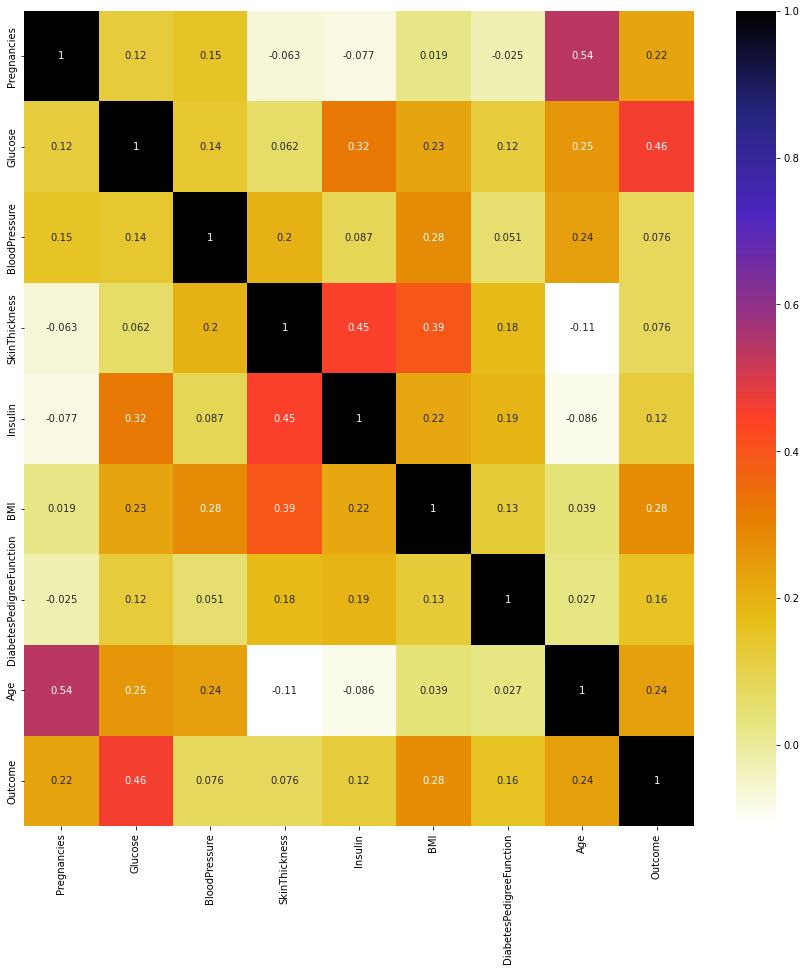

In [43]:
import seaborn as sns
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [7]:
model = RandomForestClassifier(n_estimators=20)

In [8]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [9]:
model.score(x_test,y_test)

0.98

In [10]:
y_predicted = model.predict(x_test)

In [11]:
cm = confusion_matrix(y_test,y_predicted)

In [12]:
cm

array([[260,   3],
       [  5, 132]], dtype=int64)

Text(69.0, 0.5, 'Truth')

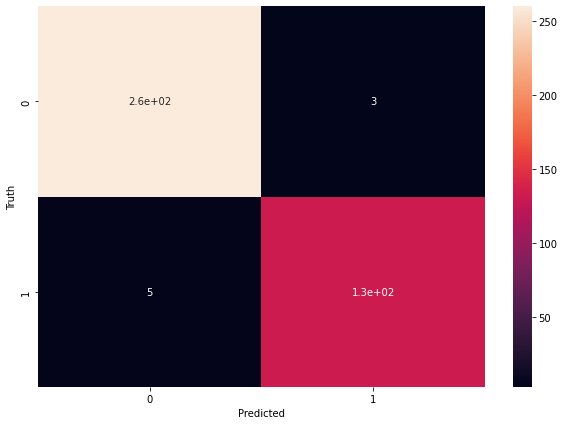

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
model.fit(X,Y)

RandomForestClassifier(n_estimators=20)

In [15]:
import joblib

In [16]:
joblib.dump(model,'Diabetes_model')

['Diabetes_model']

In [17]:
m =joblib.load('Diabetes_model')

In [35]:
data ={' Pregnancies':20,
       'Glucose':62,
       'BloodPressure':41,
       'SkinThickness':188,
       'Insulin':26.3,
       'BMI':0.493,
       'DiabetesPedigreeFunction':81,
       'Age':61,
       
    
}

dfa =pd.DataFrame(data,index=[0])
dfa

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,20,62,41,188,26.3,0.493,81,61


In [21]:
columns=['Pregnancies'                
,'Glucose'                     
,'BloodPressure'               
,'SkinThickness'               
,'Insulin'                     
,'BMI'                         
,'DiabetesPedigreeFunction'    
,'Age'                         
,'Outcome'         ]

In [33]:
def val_count():
    for col in columns:
        val_count = df[col].value_counts()
        print('value_count of ',col, " \n" ,val_count)
        print('--------------------------------------------------------------------')
        

In [34]:
val_count()

value_count of  Pregnancies  
 1     356
0     301
2     284
3     195
4     191
5     141
6     131
7     100
8      96
9      70
10     54
11     24
12     23
13     22
14      7
17      3
15      2
Name: Pregnancies, dtype: int64
--------------------------------------------------------------------
value_count of  Glucose  
 99     49
100    44
102    39
129    37
112    36
       ..
67      2
191     2
44      2
62      2
177     2
Name: Glucose, Length: 136, dtype: int64
--------------------------------------------------------------------
value_count of  BloodPressure  
 74     145
70     144
78     128
68     125
64     120
72     118
80      98
62      94
76      93
60      92
0       90
82      83
88      67
66      65
84      61
90      55
58      54
86      53
50      31
54      31
56      31
52      29
75      20
65      19
94      18
85      14
48      13
92      12
44      11
106      9
100      9
96       8
98       8
110      7
46       6
104      5
108      5
55       4


In [36]:
m.predict(dfa)

array([0], dtype=int64)

In [37]:
model.predict(dfa)

array([0], dtype=int64)

In [39]:
df[200:210][:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
200,0,113,80,16,0,31.0,0.874,21,0
201,1,138,82,0,0,40.1,0.236,28,0
202,0,108,68,20,0,27.3,0.787,32,0
203,2,99,70,16,44,20.4,0.235,27,0
204,6,103,72,32,190,37.7,0.324,55,0
205,5,111,72,28,0,23.9,0.407,27,0
206,8,196,76,29,280,37.5,0.605,57,1
207,5,162,104,0,0,37.7,0.151,52,1
208,1,96,64,27,87,33.2,0.289,21,0
209,7,184,84,33,0,35.5,0.355,41,1
